<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/KNN_10classes__with_PCA_FDA_%26_preprocess_TEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN_10classes_ with PCA_FDA & preprocess

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import pickle
import scipy.io
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing TEP

In [3]:
##Train
Fault_Free_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

## Sorting Data
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_Train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

###consdering same sample for all calsses

In [4]:
X1=Faulty_Train[(Faulty_Train.faultNumber==1)].iloc[0:480,:]
X3=Faulty_Train[(Faulty_Train.faultNumber==3)].iloc[0:480,:]
X5=Faulty_Train[(Faulty_Train.faultNumber==5)].iloc[0:480,:]
X7=Faulty_Train[(Faulty_Train.faultNumber==7)].iloc[0:480,:]
X9=Faulty_Train[(Faulty_Train.faultNumber==9)].iloc[0:480,:]
X11=Faulty_Train[(Faulty_Train.faultNumber==11)].iloc[0:480,:]
X13=Faulty_Train[(Faulty_Train.faultNumber==13)].iloc[0:480,:]
X15=Faulty_Train[(Faulty_Train.faultNumber==15)].iloc[0:480,:]
X17=Faulty_Train[(Faulty_Train.faultNumber==17)].iloc[0:480,:]
Faulty_Train_T=pd.concat([X1,X3,X5,X7,X9,X11,X13,X15,X17])
type(Faulty_Train_T)
type(Fault_Free_Train)

Faulty_Test_1= Faulty_Test[(Faulty_Test.faultNumber==1)|
                                 (Faulty_Test.faultNumber==3 )|
                                 (Faulty_Test.faultNumber==5 )|
                                 (Faulty_Test.faultNumber==7 )|
                                 (Faulty_Test.faultNumber==9 )|
                                 (Faulty_Test.faultNumber==11 )|
                                 (Faulty_Test.faultNumber==13)|
                                 (Faulty_Test.faultNumber==15 )|
                                 (Faulty_Test.faultNumber==17)]

## Scalling All

In [5]:
Fault_Free_Train_2=(Fault_Free_Train).iloc[:,4:]
Faulty_Train_T_2=(Faulty_Train_T).iloc[:,4:]
Fault_Free_Test_2=(Fault_Free_Test).iloc[:,4:]
Faulty_Test_2=(Faulty_Test_1).iloc[:,4:]
Train=pd.concat([Fault_Free_Train,Faulty_Train_T])
Test=pd.concat([Fault_Free_Test,Faulty_Test_1])
ff = pd.concat([Fault_Free_Train_2,Faulty_Train_T_2,Fault_Free_Test_2,Faulty_Test_2])
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

In [6]:
ff.drop(['xmeas_5','xmeas_12','xmeas_15','xmeas_17','xmeas_37','xmeas_15','xmeas_17','xmv_1','xmv_7','xmv_8'],axis=1,inplace=True)

### Scaling with dropped Variables

In [7]:
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s_2 = scaler.transform(ff)

## Applying PCA

In [8]:
##PCA Function
n_components =22
pca = PCA(n_components=n_components)
pca
##PCA Data Shape Transformed
Xt = pca.fit_transform(tr_s_2)
print('Original Data Shape :',tr_s_2.shape)
print('PC Data Shape:',Xt.shape)
print('PCA Singular Values:',pca.singular_values_)


Original Data Shape : (14400, 44)
PC Data Shape: (14400, 22)
PCA Singular Values: [394.47476107 309.50992915 268.70117711 190.51041542 170.51854036
 149.92777939 124.44862801 122.91910181 120.6977151  117.93338694
 115.6278952  114.64063631 111.11884491 109.51747586 107.600573
 100.75289033  99.59673903  97.00840755  92.01164956  87.58400887
  83.36454644  74.48493345]


Vairiance Ratio for 22: 0.9328861435715358
Vairiance Ratio for 15: 0.8411625929924639
Vairiance Ratio f0r 10: 0.7426278010634666
Vairiance Ratio f0r 5: 0.6139170563966819
Vairiance Ratio:for 3: 0.5107434595059124


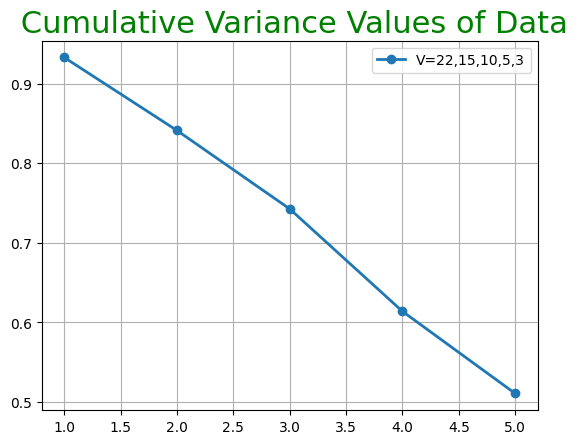

In [9]:
"""
Plotting  cumulative Variance Values
"""
Va_1=np.sum(pca.explained_variance_ratio_[0:22])
Va_2=np.sum(pca.explained_variance_ratio_[0:15])
Va_3=np.sum(pca.explained_variance_ratio_[0:10])
Va_4=np.sum(pca.explained_variance_ratio_[0:5])
Va_5=np.sum(pca.explained_variance_ratio_[0:3])
print('Vairiance Ratio for 22:', Va_1)
print('Vairiance Ratio for 15:',Va_2)
print('Vairiance Ratio f0r 10:',Va_3)
print('Vairiance Ratio f0r 5:',Va_4)
print('Vairiance Ratio:for 3:',Va_5)
font1 = {'color':'g','size':22}
plt.plot(np.arange(1,6,1),[Va_1, Va_2, Va_3,Va_4,Va_5],'o-',linewidth=2)
plt.title(' Cumulative Variance Values of Data',fontdict = font1)
plt.legend(['V=22,15,10,5,3'])
plt.grid()


## Applying KNN with PCA

In [10]:
fnumber=pd.concat([Train,Test])
Data_Train=Xt[0:4800,:]
Data_Test=Xt[4800:,:]
Label_Train=Train.iloc[:,1].values
Label_Test=Test.iloc[:,1].values

In [11]:
classifier_KNN = KNeighborsClassifier (n_neighbors = 100  ,   metric = 'minkowski'  ,  p = 3  ,  weights='distance'  ,  algorithm = 'kd_tree' )
classifier_KNN.fit(Data_Train, Label_Train)
Label_prediction = classifier_KNN.predict(Data_Test)

### Visualizing KNN

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
cm_KNN = confusion_matrix(Label_Test, Label_prediction)
print(cm_KNN)

[[169   0 164  37   0 385   0   0 204   1]
 [ 28 790  29   8   0  59   0   0  45   1]
 [151   0 179  37   0 397   0   0 193   3]
 [ 95   0  94 439  10 209   1   0 111   1]
 [ 29   0  29  11 782  64   0   0  44   1]
 [155   0 138  42   0 407   1   0 215   2]
 [123   0 130  37   0 267 208   0 152  43]
 [ 41  25  43 115 211  94   0 351  78   2]
 [161   0 154  41   0 396   0   0 206   2]
 [ 63   0 136  18   0 143  81   0  98 421]]


### Confusion Matrix

Confusion matrix, without normalization


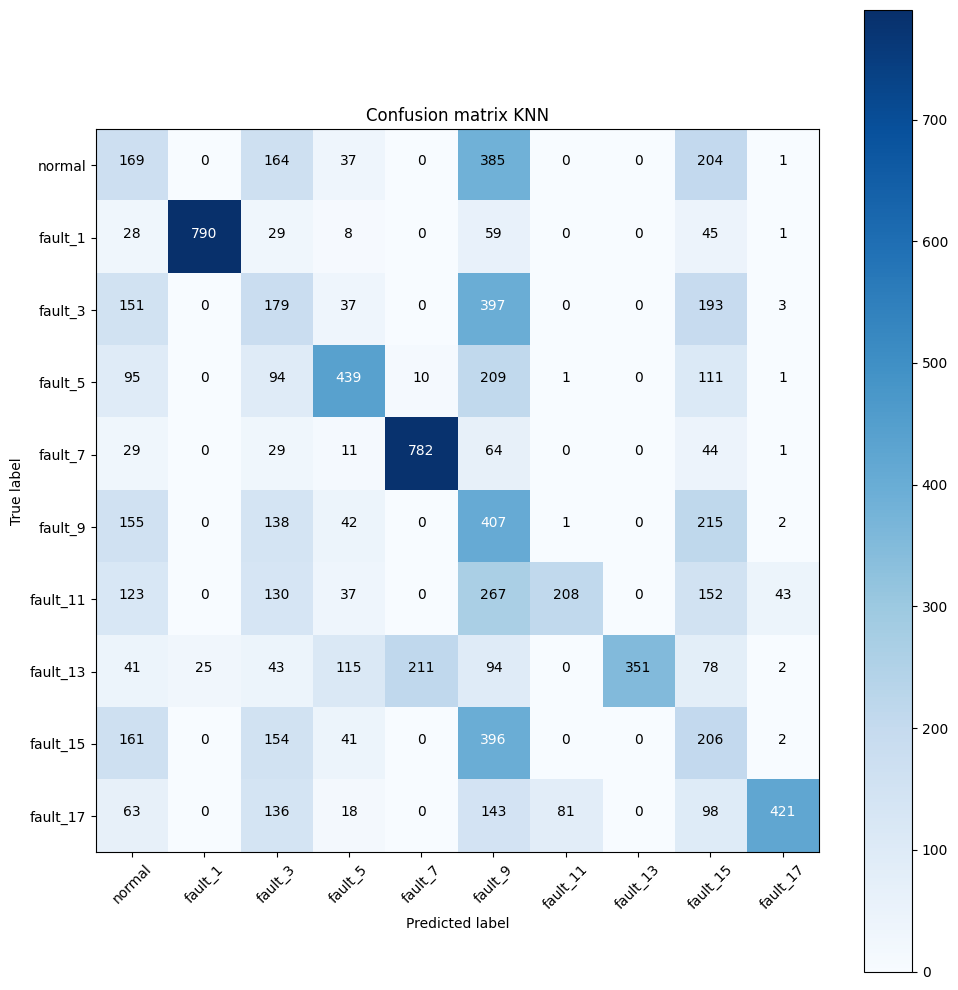

In [14]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_KNN, [ 'normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11',
       'fault_13', 'fault_15', 'fault_17'],
                          normalize=False,
                          title='Confusion matrix KNN',
                          cmap=plt.cm.Blues)

In [15]:
print(sum(cm_KNN.T))
print(sum(cm_KNN))

[960 960 960 960 960 960 960 960 960 960]
[1015  815 1096  785 1003 2421  291  351 1346  477]


### Accuracy Report KNN with PCA

In [16]:
from sklearn.metrics import classification_report
Target_Names=['normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11','fault_13', 'fault_15', 'fault_17']
print(classification_report(Label_Test,Label_prediction,target_names=Target_Names))

              precision    recall  f1-score   support

      normal       0.17      0.18      0.17       960
     fault_1       0.97      0.82      0.89       960
     fault_3       0.16      0.19      0.17       960
     fault_5       0.56      0.46      0.50       960
     fault_7       0.78      0.81      0.80       960
     fault_9       0.17      0.42      0.24       960
    fault_11       0.71      0.22      0.33       960
    fault_13       1.00      0.37      0.54       960
    fault_15       0.15      0.21      0.18       960
    fault_17       0.88      0.44      0.59       960

    accuracy                           0.41      9600
   macro avg       0.56      0.41      0.44      9600
weighted avg       0.56      0.41      0.44      9600



### Applying FDA

In [17]:
df1=pd.DataFrame(tr_s)
dfarray=df1.values
df2=df1.iloc[1000,:]
fnumber=pd.concat([Train,Test])
fnumber_1=(fnumber).iloc[:,1]
clf = LinearDiscriminantAnalysis()
X_r2=clf.fit(dfarray, fnumber_1.values).transform(dfarray)

In [18]:
Data_Train_1=X_r2[0:4800,:]
Data_Test_1=X_r2[4800:,:]
Label_Train=Train.iloc[:,1].values
Label_Test=Test.iloc[:,1].values

## Applying KNN with FDA

In [19]:
classifier_KNN = KNeighborsClassifier (n_neighbors = 100  ,   metric = 'minkowski'  ,  p = 3  ,  weights='distance'  ,  algorithm = 'kd_tree' )
classifier_KNN.fit(Data_Train_1, Label_Train)
Label_prediction_1 = classifier_KNN.predict(Data_Test_1)

### Visualizing KNN with FDA

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
cm_KNN_1 = confusion_matrix(Label_Test, Label_prediction_1)
print(cm_KNN_1)

[[224   0 245   0   0 318   0   1 172   0]
 [ 45 791  45   0   0  50   0   0  29   0]
 [230   0 259   0   0 295   0   1 175   0]
 [ 43   0  46 797   0  49   0   0  25   0]
 [ 43   0  43   0 800  49   0   0  25   0]
 [231   0 251   0   0 302   0   0 176   0]
 [115   0 109   0   0 154 493   0  86   3]
 [102   0 108   0   0 140   1 530  78   1]
 [239   0 240   0   0 323   0   0 158   0]
 [ 94   0 113   0   0 123   9   0  60 561]]


### Confusion Matrix

Confusion matrix, without normalization


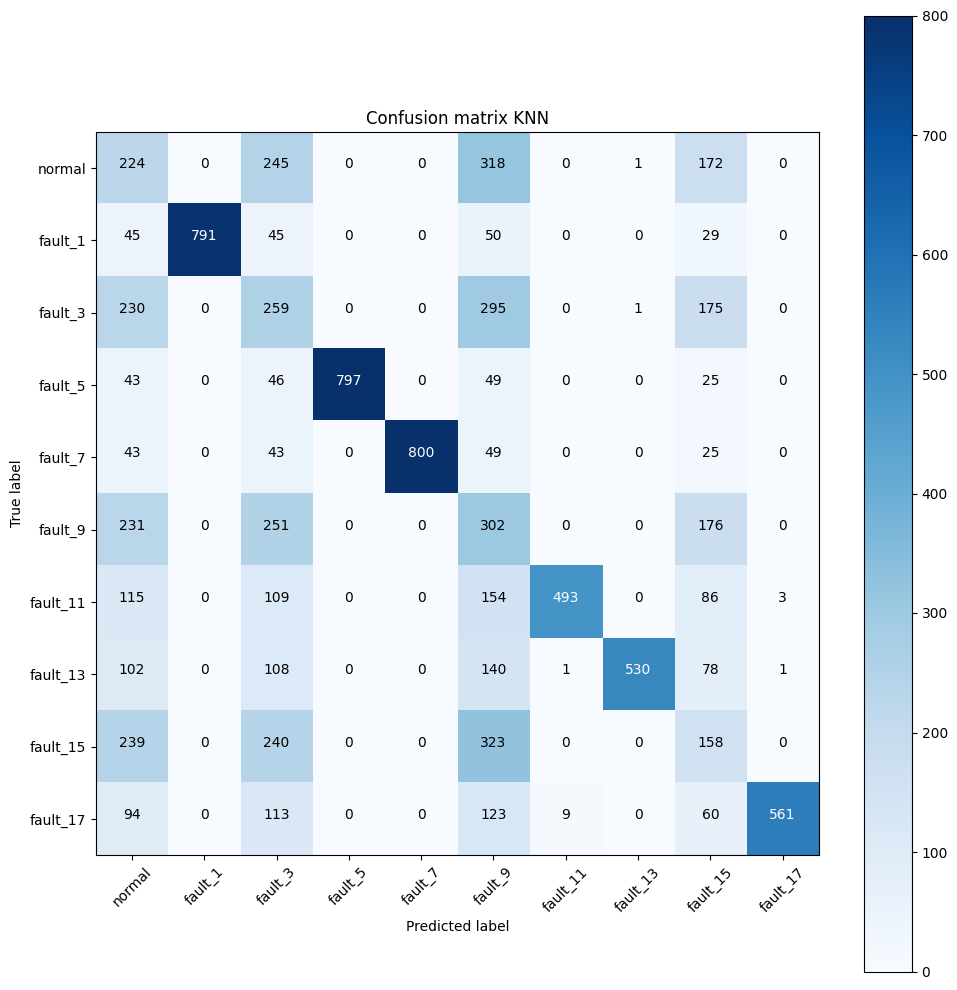

In [22]:
f = plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_KNN_1, [ 'normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11',
       'fault_13', 'fault_15', 'fault_17'],
                          normalize=False,
                          title='Confusion matrix KNN',
                          cmap=plt.cm.Blues)

In [23]:
print(sum(cm_KNN_1.T))
print(sum(cm_KNN_1))

[960 960 960 960 960 960 960 960 960 960]
[1366  791 1459  797  800 1803  503  532  984  565]


### Accuracy Report KNN with FDA

In [24]:
from sklearn.metrics import classification_report
Target_Names=['normal','fault_1', 'fault_3', 'fault_5', 'fault_7', 'fault_9', 'fault_11','fault_13', 'fault_15', 'fault_17']
print(classification_report(Label_Test,Label_prediction_1,target_names=Target_Names))

              precision    recall  f1-score   support

      normal       0.16      0.23      0.19       960
     fault_1       1.00      0.82      0.90       960
     fault_3       0.18      0.27      0.21       960
     fault_5       1.00      0.83      0.91       960
     fault_7       1.00      0.83      0.91       960
     fault_9       0.17      0.31      0.22       960
    fault_11       0.98      0.51      0.67       960
    fault_13       1.00      0.55      0.71       960
    fault_15       0.16      0.16      0.16       960
    fault_17       0.99      0.58      0.74       960

    accuracy                           0.51      9600
   macro avg       0.66      0.51      0.56      9600
weighted avg       0.66      0.51      0.56      9600

